# All about wines!

![wines](wines.jpg)

In [29]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import sqlite3

In [30]:
con = sqlite3.connect("wines_data.db")
wines = pd.read_sql_query("SELECT * FROM 'wines_data'",con)
print(wines)

                           winery  \
0     Domaine de La Romanée-Conti   
1     Domaine de La Romanée-Conti   
2              Domaine Coche-Dury   
3              Domaine Coche-Dury   
4                          Jarvis   
...                           ...   
2461                          AIX   
2462         Domaine Sainte Lucie   
2463            Château d'Esclans   
2464              Chateau Purcari   
2465               Wölffer Estate   

                                                   wine  \
0                             Montrachet Grand Cru 2010   
1                             Montrachet Grand Cru 2014   
2                           Meursault Les Rougeots 2001   
3                     Corton-Charlemagne Grand Cru N.V.   
4     Estate Finch Hollow Chardonnay (Cave Fermented...   
...                                                 ...   
2461                                          Rosé 2017   
2462            MiP Classic Côtes de Provence Rosé N.V.   
2463                    

In [31]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   winery      2466 non-null   object 
 1   wine        2466 non-null   object 
 2   location    2460 non-null   object 
 3   image       2466 non-null   object 
 4   id          2466 non-null   int64  
 5   wine_type   2466 non-null   object 
 6   country     2466 non-null   object 
 7   avg_rating  2466 non-null   float64
 8   reviews     2466 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 173.5+ KB


In [32]:
wines.sample(5)

,winery,wine,location,image,id,wine_type,country,avg_rating,reviews
842,Vega Sicilia,Unico Reserva Especial Edición 1993,Ribera del Duero,https://images.vivino.com/thumbs/k_UetHZ3Q2SMq...,339,red,Spain,4.8,45
1046,Domaine de La Romanée-Conti,Richebourg Grand Cru N.V.,Richebourg Grand Cru,https://images.vivino.com/thumbs/cohA0QIVTGmup...,543,red,France,4.7,3391
2429,L'Avenir,Glen Rosé 2016,Stellenbosch,https://images.vivino.com/thumbs/1-jeI4lUQBOkB...,472,rose,South Africa,4.2,27
2135,Andrian,Lagrein Rosé 2017,Südtirol - Alto Adige,https://images.vivino.com/thumbs/LrtqJ2EsTviLf...,178,rose,Italy,4.3,28
1807,Pol Roger,Sir Winston Churchill Brut Champagne 1995,Champagne,https://images.vivino.com/thumbs/HlLhUWbyTfupk...,586,sparkling,France,4.5,64


### Check if there is any missing value/null 

In [33]:
wines.isna().sum()

winery        0
wine          0
location      6
image         0
id            0
wine_type     0
country       0
avg_rating    0
reviews       0
dtype: int64

In [34]:
# Dropping rows where 'location' column has None values
wines.dropna(subset=["location"], inplace=True)

wines.isna().sum()

winery        0
wine          0
location      0
image         0
id            0
wine_type     0
country       0
avg_rating    0
reviews       0
dtype: int64

In [35]:
# check if there is missing value in new column
wines["country"].isnull().sum()

0

### Check unique countries

In [36]:
count_countries=wines["country"].nunique()
unique_countries=wines["country"].unique()

print(f"There are {count_countries} countries in this data, they are:\n {unique_countries}")

There are 24 countries in this data, they are:
 ['France' 'United States' 'Germany' 'Austria' 'Italy' 'Spain'
 'South Africa' 'Portugal' 'Romania' 'Australia' 'Switzerland'
 'New Zealand' 'Argentina' 'Hungary' 'Chile' 'Macedonia' 'Canada' 'Brazil'
 'Slovenia' 'Georgia' 'Greece' 'Israel' 'Turkey' 'Moldova']


## How manmy wines produced by each country?

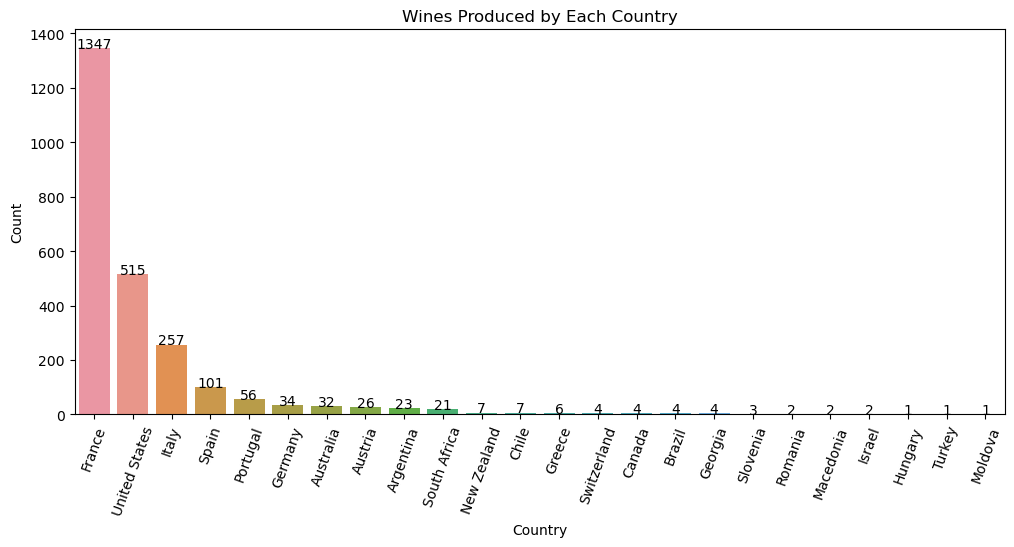

In [37]:
country_counts = wines["country"].value_counts().reset_index()
country_counts.columns = ["Country", "Count"]

plt.figure(figsize=(12, 5))
sns.barplot(x="Country", y="Count", data=country_counts)
plt.title("Wines Produced by Each Country")
plt.xlabel("Country")
plt.ylabel("Count")

# Annotate the bars with count values
for index, row in country_counts.iterrows():
    plt.text(index, row["Count"], str(row["Count"]), ha="center")

plt.xticks(rotation=70) 
plt.show()

In [38]:
fig = px.pie(country_counts, values="Count", names="Country", title="Counts of Wines Produced by Each Country")
fig.update_layout(width=900, height=700) 
fig.show()

In [39]:
#Top 5 wines that has most reviews
wines=wines.sort_values("reviews",ascending=False)
wines.head()

,winery,wine,location,image,id,wine_type,country,avg_rating,reviews
1364,Dom Pérignon,Brut Champagne N.V.,Champagne,https://images.vivino.com/thumbs/s5aXYaQiTu-V_...,143,sparkling,France,4.6,77880
2456,Château d'Esclans,Whispering Angel Rosé N.V.,Côtes de Provence,https://images.vivino.com/thumbs/Ki7znlmVT7iu_...,499,rose,France,4.1,32045
1030,Vega Sicilia,Unico N.V.,Ribera del Duero,https://images.vivino.com/thumbs/SCnpJk_ySUe6X...,527,red,Spain,4.7,28050
1365,Louis Roederer,Cristal Brut Champagne (Millésimé) N.V.,Champagne,https://images.vivino.com/thumbs/bXZK_MhMQi-a2...,144,sparkling,France,4.6,22349
1031,Pétrus,Pomerol N.V.,Pomerol,https://images.vivino.com/thumbs/RPhc1fBwT0uLK...,528,red,France,4.7,21459


## List Top 10 wineries that have produced the highest number of distinct wines. 

In [40]:
count_winery=wines["winery"].nunique()
top_10_wineries = wines["winery"].value_counts().head(10)

print(f"Number of unique winery: {count_winery}")
print(f"Top 10 winery:\n{top_10_wineries}")

Number of unique winery: 782
Top 10 winery:
winery
Dom Pérignon                   99
Krug                           60
Domaine de La Romanée-Conti    59
Louis Roederer                 44
Domaine Leflaive               36
Vega Sicilia                   35
Domaine Coche-Dury             35
Bollinger                      34
Ruinart                        33
Veuve Clicquot                 30
Name: count, dtype: int64


## The distribution of wineries across countries.

In [41]:
top_wineries_by_country = wines.groupby("country")["winery"].value_counts().groupby(level=0).head(10).reset_index(name="count")

print(top_wineries_by_country)

           country          winery  count
0        Argentina      Viña Cobos     12
1        Argentina   Catena Zapata      4
2        Argentina    Rosell Boher      2
3        Argentina        Nosotros      2
4        Argentina  Achaval-Ferrer      1
..             ...             ...    ...
125  United States   Peter Michael     13
126  United States          Aubert     13
127  United States            Bond     12
128  United States       Scarecrow      9
129  United States           Realm      8

[130 rows x 3 columns]


In [42]:
fig = px.bar(top_wineries_by_country, x="country", y="count", color="winery", title="Top 10 Wineries per Country")

fig.update_layout(xaxis_title="Country", yaxis_title="Count", xaxis_tickangle=45)
fig.show()

## Look at what France has!

In [43]:
wineries_in_france = wines[wines["country"] == "France"]["winery"].nunique()

print(f"There are {wineries_in_france} wineries in France!! ")


There are 311 wineries in France!! 


##  The number of unique wines produced in each country.

In [44]:
wine_count_per_country = wines.groupby("country")["wine"].nunique().reset_index()
wine_count_per_country.columns = ["Country", "Unique Wine Count"]

print(wine_count_per_country)


          Country  Unique Wine Count
0       Argentina                 23
1       Australia                 32
2         Austria                 26
3          Brazil                  4
4          Canada                  4
5           Chile                  7
6          France               1241
7         Georgia                  4
8         Germany                 34
9          Greece                  6
10        Hungary                  1
11         Israel                  2
12          Italy                256
13      Macedonia                  2
14        Moldova                  1
15    New Zealand                  7
16       Portugal                 56
17        Romania                  2
18       Slovenia                  3
19   South Africa                 21
20          Spain                101
21    Switzerland                  4
22         Turkey                  1
23  United States                480


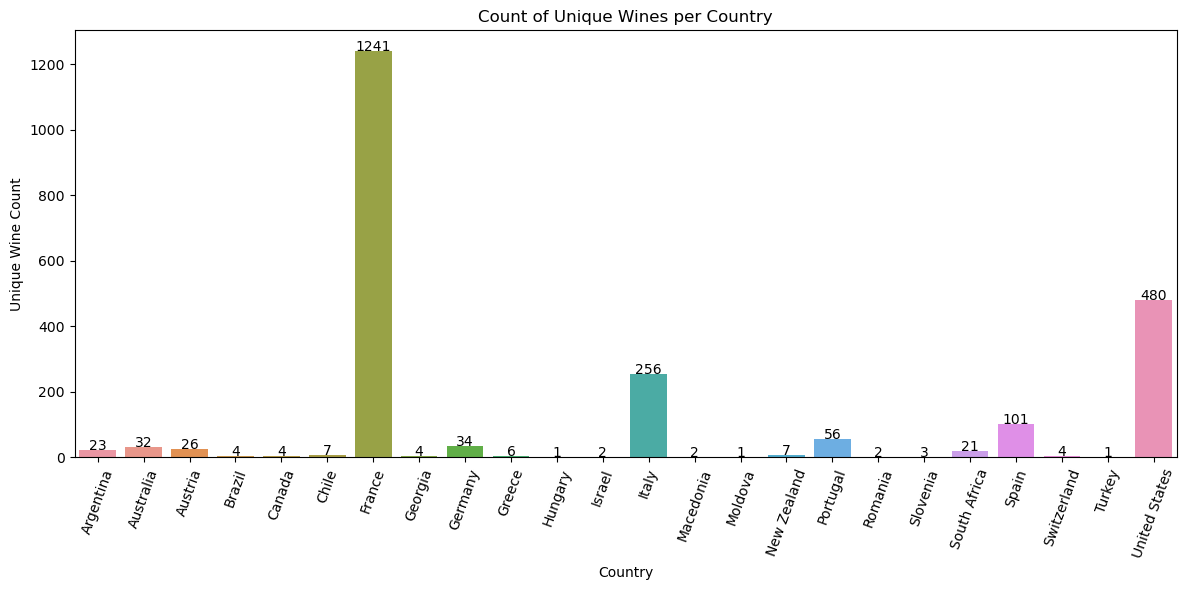

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Country", y="Unique Wine Count", data=wine_count_per_country)
plt.title("Count of Unique Wines per Country")
plt.xlabel("Country")
plt.ylabel("Unique Wine Count")

for index, row in wine_count_per_country.iterrows():
    plt.text(index, row["Unique Wine Count"], str(row["Unique Wine Count"]), ha="center")

plt.xticks(rotation=70)  
plt.tight_layout()

plt.show()


## Distribution of wines across countries

In [46]:
#  choropleth map
fig = px.choropleth(wine_count_per_country, 
                    locations="Country", 
                    locationmode="country names", 
                    color="Unique Wine Count",
                    title="Count of Unique Wines per Country",
                    hover_name="Country",
                    color_continuous_scale="Cividis")
fig.update_layout(height=400, width=700)

fig.show()

## Which type of wine stand out based on the overall reviews and average tatings?

In [47]:
wine_type_stats = wines.groupby("wine_type").agg({"reviews": "sum", "avg_rating": "mean"})

popular_wine_types = wine_type_stats.sort_values(by=["reviews", "avg_rating"], ascending=False)

print("Popular wine types based on total reviews and average rating:")
print(popular_wine_types)


Popular wine types based on total reviews and average rating:
           reviews  avg_rating
wine_type                     
sparkling   457969    4.578261
red         380567    4.782303
rose        162780    4.253150
white        41142    4.642460


In [48]:
fig = px.scatter(wines, x="avg_rating", y="reviews", color="country",
                 title="Relationship between Average Rating and Reviews by Countries",
                 labels={"avg_rating": "Average Rating", "reviews": "Number of Reviews"},
                 hover_data={"country": True},
                 size="reviews", 
                 size_max=60 )
fig.show()


In [49]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

grouped = wines.groupby("country")

num_countries = len(grouped)
rows = (num_countries - 1) // 3 + 1  
cols = min(num_countries, 3)  

fig = make_subplots(rows=rows, cols=cols, shared_xaxes=True, shared_yaxes=True)

for i, (country, group) in enumerate(grouped, 1):
    row = (i - 1) // cols + 1
    col = (i - 1) % cols + 1
    scatter = go.Scatter(x=group["avg_rating"], y=group["reviews"], mode="markers", name=country)
    fig.add_trace(scatter, row=row, col=col)

fig.update_layout(height=600,width=800,title="Relationship between Average Rating and Reviews by Country")
fig.update_xaxes(title_text="Average Rating", row=rows, col=1)
fig.update_yaxes(title_text="Number of Reviews", row=1, col=1)

fig.show()


## Lets take look at Top 5 rating wines in each type!

In [50]:
top_rated_wines_by_type = wines.groupby("wine_type").apply(lambda x: x.nlargest(5, "avg_rating")).reset_index(drop=True)

for wine_type, group in top_rated_wines_by_type.groupby("wine_type"):
    print(f"Top 5 rated wines in {wine_type}:")
    for index, row in group.iterrows():
        print(f"{row['wine']} - Rating: {row['avg_rating']}")
    print()

Top 5 rated wines in red:
Emporda 2012 - Rating: 4.9
Amarone della Valpolicella Riserva N.V. - Rating: 4.9
Pêra-Manca Tinto 1990 - Rating: 4.9
Cabernet Sauvignon RBS Beckstoffer To Kalon Vineyard 2015 - Rating: 4.9
Wraith Cabernet Sauvignon 2013 - Rating: 4.9

Top 5 rated wines in rose:
Angelicall Rosé 2014 - Rating: 4.7
Fonte de' Medici 2011 - Rating: 4.6
281 Rosé 2014 - Rating: 4.6
Clos de Capelune Côtes de Provence Rosé 2017 - Rating: 4.6
Rosé 2016 - Rating: 4.6

Top 5 rated wines in sparkling:
Clos d'Ambonnay Blanc de Noirs Brut Champagne 1995 - Rating: 4.9
P2 Plénitude Brut Champagne 1995 - Rating: 4.9
Belle Epoque Brut Champagne 1979 - Rating: 4.9
Brut Premier Champagne 1993 - Rating: 4.9
Oenothèque Brut Champagne 1976 - Rating: 4.9

Top 5 rated wines in white:
Montrachet Grand Cru 2010 - Rating: 4.9
Montrachet Grand Cru 2014 - Rating: 4.9
Meursault Les Rougeots 2001 - Rating: 4.9
Corton-Charlemagne Grand Cru N.V. - Rating: 4.8
Estate Finch Hollow Chardonnay (Cave Fermented) 2014

In [51]:
top_ranked_wines_by_type = (wines.groupby("wine_type").apply(lambda x: x.nsmallest(5,"reviews")).reset_index(drop=True))

for wine_type, group in top_ranked_wines_by_type.groupby("wine_type"):
    print(f"Top 5 ranked wines in {wine_type}:")
    for index, row in group.iterrows():
        print(f"{row['wine']} - Rank: {row['reviews']}")
    print()

Top 5 ranked wines in red:
Family Collection Amarone della Valpolicella 2007 - Rank: 25
Mount Veeder Cabernet Sauvignon 2003 - Rank: 25
Amarone della Valpolicella Classico 2004 - Rank: 25
Finca Bella Vista Malbec 2003 - Rank: 25
Showket Vineyard Cabernet Sauvignon 2007 - Rank: 25

Top 5 ranked wines in rose:
Chiaretto Garda Classico Rosé 2010 - Rank: 25
Sancerre Rosé 2014 - Rank: 25
Pinot Gris on Skins 2016 - Rank: 25
Count's Selection Pinot Noir Rosé 2011 - Rank: 25
Bastide Blanche 2018 - Rank: 25

Top 5 ranked wines in sparkling:
J. Schram Brut Rosé 2006 - Rank: 25
Réserve Familiale Extra Brut Champagne Grand Cru 'Aÿ' 2004 - Rank: 25
Sir Winston Churchill Brut Champagne 2012 - Rank: 25
Rare Brut Champagne (Millesimé) 2007 - Rank: 25
Blanc de Blancs Brut Champagne 2017 - Rank: 25

Top 5 ranked wines in white:
Meursault Les Rougeots 2001 - Rank: 25
Clos Sainte Hune Riesling Alsace 1996 - Rank: 25
Gaia & Rey Langhe 1998 - Rank: 25
Bâtard-Montrachet Grand Cru 2011 - Rank: 25
G-Max Riesli

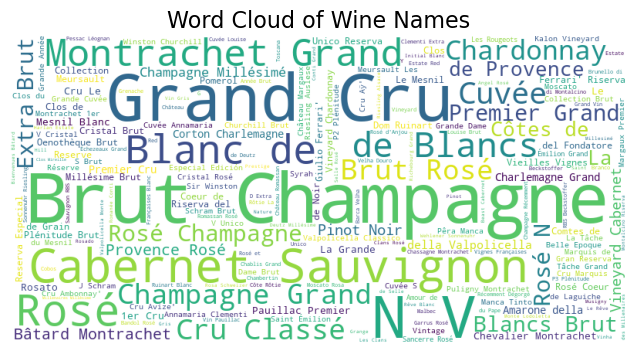

In [52]:
# make a word cloud for wine names

wine_names = " ".join(wine for wine in wines["wine"])
wine_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(wine_names)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.imshow(wine_wordcloud)
plt.title('Word Cloud of Wine Names', fontsize=16)
plt.axis('off')
plt.tight_layout(pad=4)
plt.show()

## Top 20 most frequently words in wine names?

In [53]:

words = [word for word in wine_names.split() if len(word) > 1]

word_frequency = Counter(words)

word_frequency_df = pd.DataFrame(list(word_frequency.items()), columns=["Word", "Frequency"])

word_frequency_df = word_frequency_df.sort_values(by="Frequency", ascending=False)

print(word_frequency_df.head(20))

          Word  Frequency
1    Champagne        599
0         Brut        557
5         Rosé        511
47         Cru        433
46       Grand        381
14          de        324
2         N.V.        295
74    Cabernet        183
75   Sauvignon        181
15       Blanc        179
56        2015        138
41        2016        127
97        2013        125
130       2012        118
18       Cuvée        110
76        2014        106
134   Vineyard        106
16      Blancs        100
39        2017         99
99        2010         94


## Show pics of Top5 popular wines

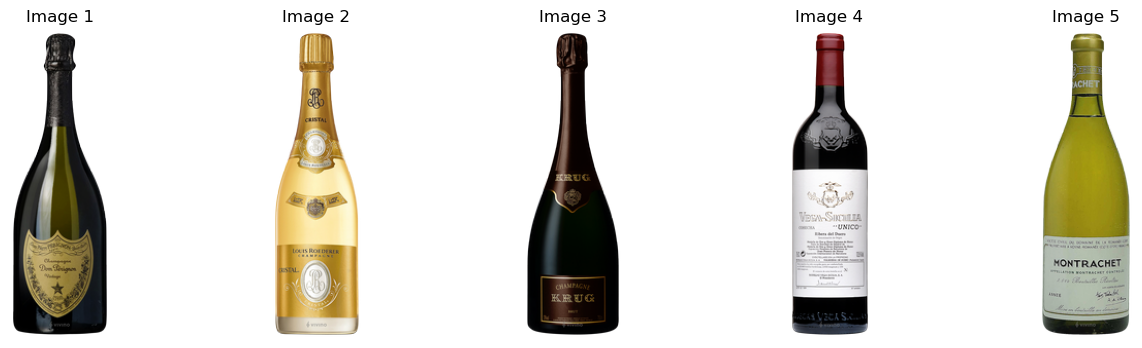

In [54]:
top_wines = wines["image"].value_counts().head(5).index

fig, axes = plt.subplots(1, 5, figsize=(16, 4)) 

for i, img_url in enumerate(top_wines):
    im = Image.open(requests.get(img_url, stream=True).raw)
    axes[i].imshow(im)
    axes[i].set_title(f"Image {i+1}") 
    axes[i].axis("off")
plt.show()

## Show pics of Top5 most rated wine

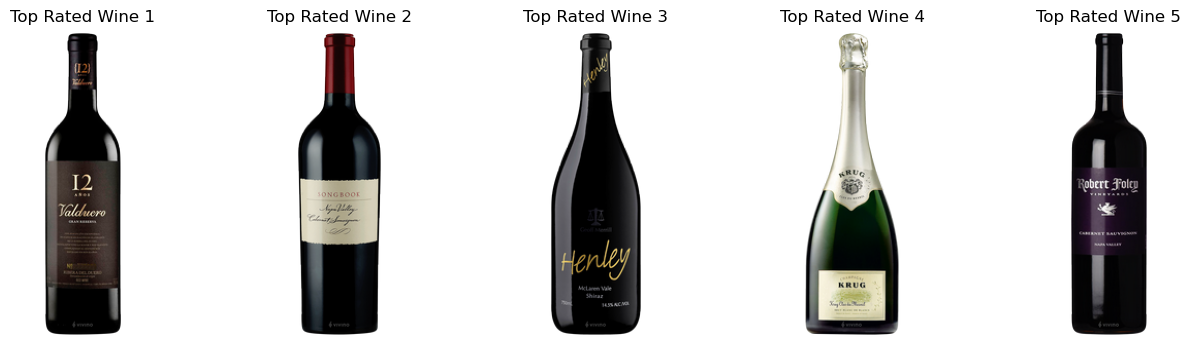

In [55]:
sorted_df = wines.sort_values(by="avg_rating", ascending=False)

fig, axes = plt.subplots(1, 5, figsize=(16, 4))  

for i in range(5):
    img_url = sorted_df.iloc[i]["image"] 
    im = Image.open(requests.get(img_url, stream=True).raw)
    axes[i].imshow(im)
    axes[i].set_title(f"Top Rated Wine {i+1}")  
    axes[i].axis("off")
    
plt.show()


In [56]:
import os
os.system("say 'Yeahhhhhhhhppi. All cells has been runed!'")

0